# 🍦 Dondurma Çılgınlığı: Sıcaklık ve Satışlar Arasındaki Tatlı İlişki 2.0 🌡️


## 📊 Veri Setimize Bir Göz Atalım: Dondurma Küplerini Sayalım!

 - Öncelikle, Python'un en soğuk kütüphanelerini import edelim. Bu kütüphaneler, veri analizi dünyasının adeta waffle konileri gibi - her şeyi daha lezzetli hale getiriyorlar!


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose

## Bölüm 2: Bir Kutuyu Açalım - Veri Setimizi Keşfedelim

Sıcaklık ve dondurma satışları verilerimiz var! Haydi, bu veriyi açalım ve ne olduğunu anlayalım. Bunun için veri setinin üst kısmına bir göz atarak nelerle çalışacağımıza bakalım.

In [5]:
df = pd.read_csv('//Users/erkanozturk/Desktop/Data-Sience/ML/Regression/Linear Regression/ulkeler_sicaklik_dondurma_satisi.csv')

In [36]:
print(df.head())
print("\nVeri setimizde toplam", len(df), "satır var. Bu kadar dondurma, galaksiyi bile soğutabilir!")

      Ülke   Yıl     Ay  Sıcaklık (C)  Dondurma Satışı (Adet)
0  Türkiye  1993   Ocak         28.82                     339
1  Türkiye  1993  Şubat         21.39                     272
2  Türkiye  1993   Mart          8.89                     171
3  Türkiye  1993  Nisan         10.34                     153
4  Türkiye  1993  Mayıs          6.06                     141

Veri setimizde toplam 1800 satır var. Bu kadar dondurma, galaksiyi bile soğutabilir!


## 🕵️‍♀️ Veri Keşfi: Dondurma Dünyasının Derinliklerine İniyoruz!

 - Veri setimizi daha yakından inceleyelim. Bu, adeta bir dondurma külahının içine bakmak gibi - her katmanda yeni bir sürpriz var!

In [7]:
df.shape

(1800, 5)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ülke                    1800 non-null   object 
 1   Yıl                     1800 non-null   int64  
 2   Ay                      1800 non-null   object 
 3   Sıcaklık (C)            1800 non-null   float64
 4   Dondurma Satışı (Adet)  1800 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 70.4+ KB


In [42]:
print("\nİstatistiksel Özet (ya da 'Dondurma Menümüz'):")
df.describe().T


İstatistiksel Özet (ya da 'Dondurma Menümüz'):


,count,mean,std,min,25%,50%,75%,max
Yıl,1800.0,2007.500000,8.657847,1993.00,2000.000,2007.50,2015.000,2022.00
Sıcaklık (C),1800.0,15.938689,12.508253,-14.97,7.295,16.78,25.115,39.99
Dondurma Satışı (Adet),1800.0,208.250556,129.419944,-138.00,117.000,218.00,306.250,497.00


In [41]:
print("\nEksik veri var mı? Yoksa hepsini mi yedik?")
df.isnull().sum()


Eksik veri var mı? Yoksa hepsini mi yedik?


Ülke                      0
Yıl                       0
Ay                        0
Sıcaklık (C)              0
Dondurma Satışı (Adet)    0
dtype: int64

In [40]:
print("\nHer ülkeden kaç veri noktamız var? Ülkelerin dondurma rekoru:")
df['Ülke'].value_counts()


Her ülkeden kaç veri noktamız var? Ülkelerin dondurma rekoru:


Ülke
Türkiye     360
Almanya     360
Japonya     360
Brezilya    360
Kanada      360
Name: count, dtype: int64

#### Vay canına! Bu veri seti, adeta bir dondurma fabrikasının üretim kayıtları gibi! 🏭🍦

## 🌈 Görselleştirme: Dondurma Grafiklerimiz Gökkuşağından Daha Renkli!

### 1. Ülkelere Göre Ortalama Dondurma Satışları: Dondurma Olimpiyatları!


/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129351 (\N{FIRST PLACE MEDAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129352 (\N{SECOND PLACE MEDAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129353 (\N{THIRD PLACE MEDAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


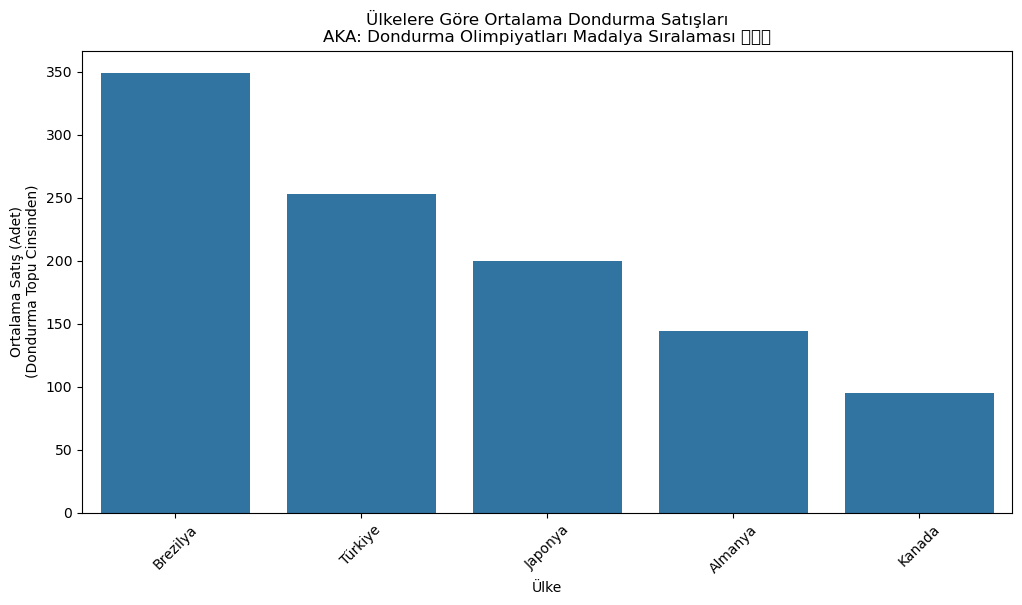

Ve altın madalyanın sahibi: Brezilya! 🏆
Bu ülke ortalama 349.31 adet dondurma satışıyla zirvede!
Görünüşe göre Kanada biraz daha çaba göstermeli, belki de daha fazla çeşit sunmalı? 🤔


In [43]:
plt.figure(figsize=(12, 6))
country_sales = df.groupby('Ülke')['Dondurma Satışı (Adet)'].mean().sort_values(ascending=False)
sns.barplot(x=country_sales.index, y=country_sales.values)
plt.title('Ülkelere Göre Ortalama Dondurma Satışları\nAKA: Dondurma Olimpiyatları Madalya Sıralaması 🥇🥈🥉')
plt.ylabel('Ortalama Satış (Adet)\n(Dondurma Topu Cinsinden)')
plt.xticks(rotation=45)
plt.show()

print(f"Ve altın madalyanın sahibi: {country_sales.index[0]}! 🏆")
print(f"Bu ülke ortalama {country_sales.values[0]:.2f} adet dondurma satışıyla zirvede!")
print(f"Görünüşe göre {country_sales.index[-1]} biraz daha çaba göstermeli, belki de daha fazla çeşit sunmalı? 🤔")

### 2. Sıcaklık ve Dondurma Satışları Arasındaki İlişki: Isınan Havalar, Eriyen Cüzdanlar!


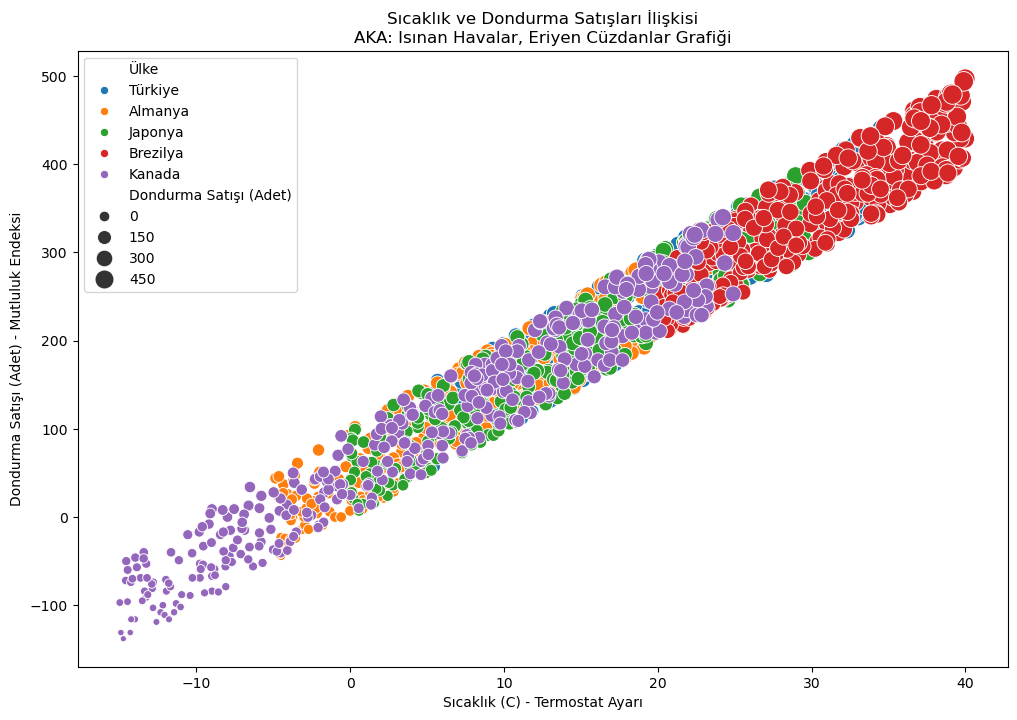

Sıcaklık ve dondurma satışları arasındaki korelasyon: 0.97
Bu demek oluyor ki, hava ısındıkça insanlar daha çok serinlemek istiyor... Kim bilebilirdi?! 😉


In [44]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Sıcaklık (C)', y='Dondurma Satışı (Adet)', hue='Ülke', size='Dondurma Satışı (Adet)', sizes=(20, 200))
plt.title('Sıcaklık ve Dondurma Satışları İlişkisi\nAKA: Isınan Havalar, Eriyen Cüzdanlar Grafiği')
plt.xlabel('Sıcaklık (C) - Termostat Ayarı')
plt.ylabel('Dondurma Satışı (Adet) - Mutluluk Endeksi')
plt.show()

correlation = df['Sıcaklık (C)'].corr(df['Dondurma Satışı (Adet)'])
print(f"Sıcaklık ve dondurma satışları arasındaki korelasyon: {correlation:.2f}")
print("Bu demek oluyor ki, hava ısındıkça insanlar daha çok serinlemek istiyor... Kim bilebilirdi?! 😉")

### 3. Aylara Göre Dondurma Satışları: Takvimde Dondurma Mevsimi!

Burada sıcaklık ile dondurma satışları arasındaki ilişkiyi analiz ediyoruz. Acaba sıcaklık arttıkça dondurma satışları da artıyor mu? Bunu korelasyon dediğimiz bir ölçü ile bulabiliriz. Korelasyon, iki değişkenin birbirini ne kadar etkilediğini gösterir.

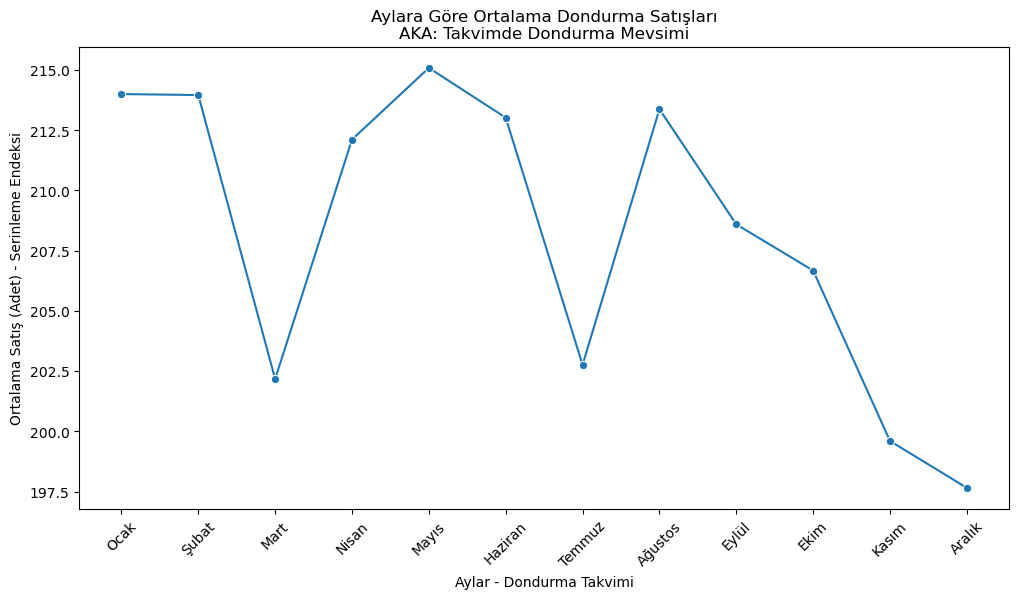

Dondurma satışlarının zirve yaptığı ay: Mayıs 🏔️
Bu ayda ortalama 215.09 adet dondurma satılıyor!
Görünüşe göre Mayıs ayında dondurma bayileri adeta para basıyor! 💰🍦


In [45]:
monthly_sales = df.groupby('Ay')['Dondurma Satışı (Adet)'].mean().reindex(['Ocak', 'Şubat', 'Mart', 'Nisan', 'Mayıs', 'Haziran', 'Temmuz', 'Ağustos', 'Eylül', 'Ekim', 'Kasım', 'Aralık'])

plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title('Aylara Göre Ortalama Dondurma Satışları\nAKA: Takvimde Dondurma Mevsimi')
plt.xlabel('Aylar - Dondurma Takvimi')
plt.ylabel('Ortalama Satış (Adet) - Serinleme Endeksi')
plt.xticks(rotation=45)
plt.show()

peak_month = monthly_sales.idxmax()
peak_sales = monthly_sales.max()
print(f"Dondurma satışlarının zirve yaptığı ay: {peak_month} 🏔️")
print(f"Bu ayda ortalama {peak_sales:.2f} adet dondurma satılıyor!")
print(f"Görünüşe göre {peak_month} ayında dondurma bayileri adeta para basıyor! 💰🍦")

### 🎢 Trend ve Mevsimsellik Analizi: Dondurmanın Zaman Yolculuğu!


#### Dondurma satışlarının zaman içindeki değişimini inceleyelim. Bu, adeta bir dondurma çubuğunun zaman makinesine binmesi gibi!

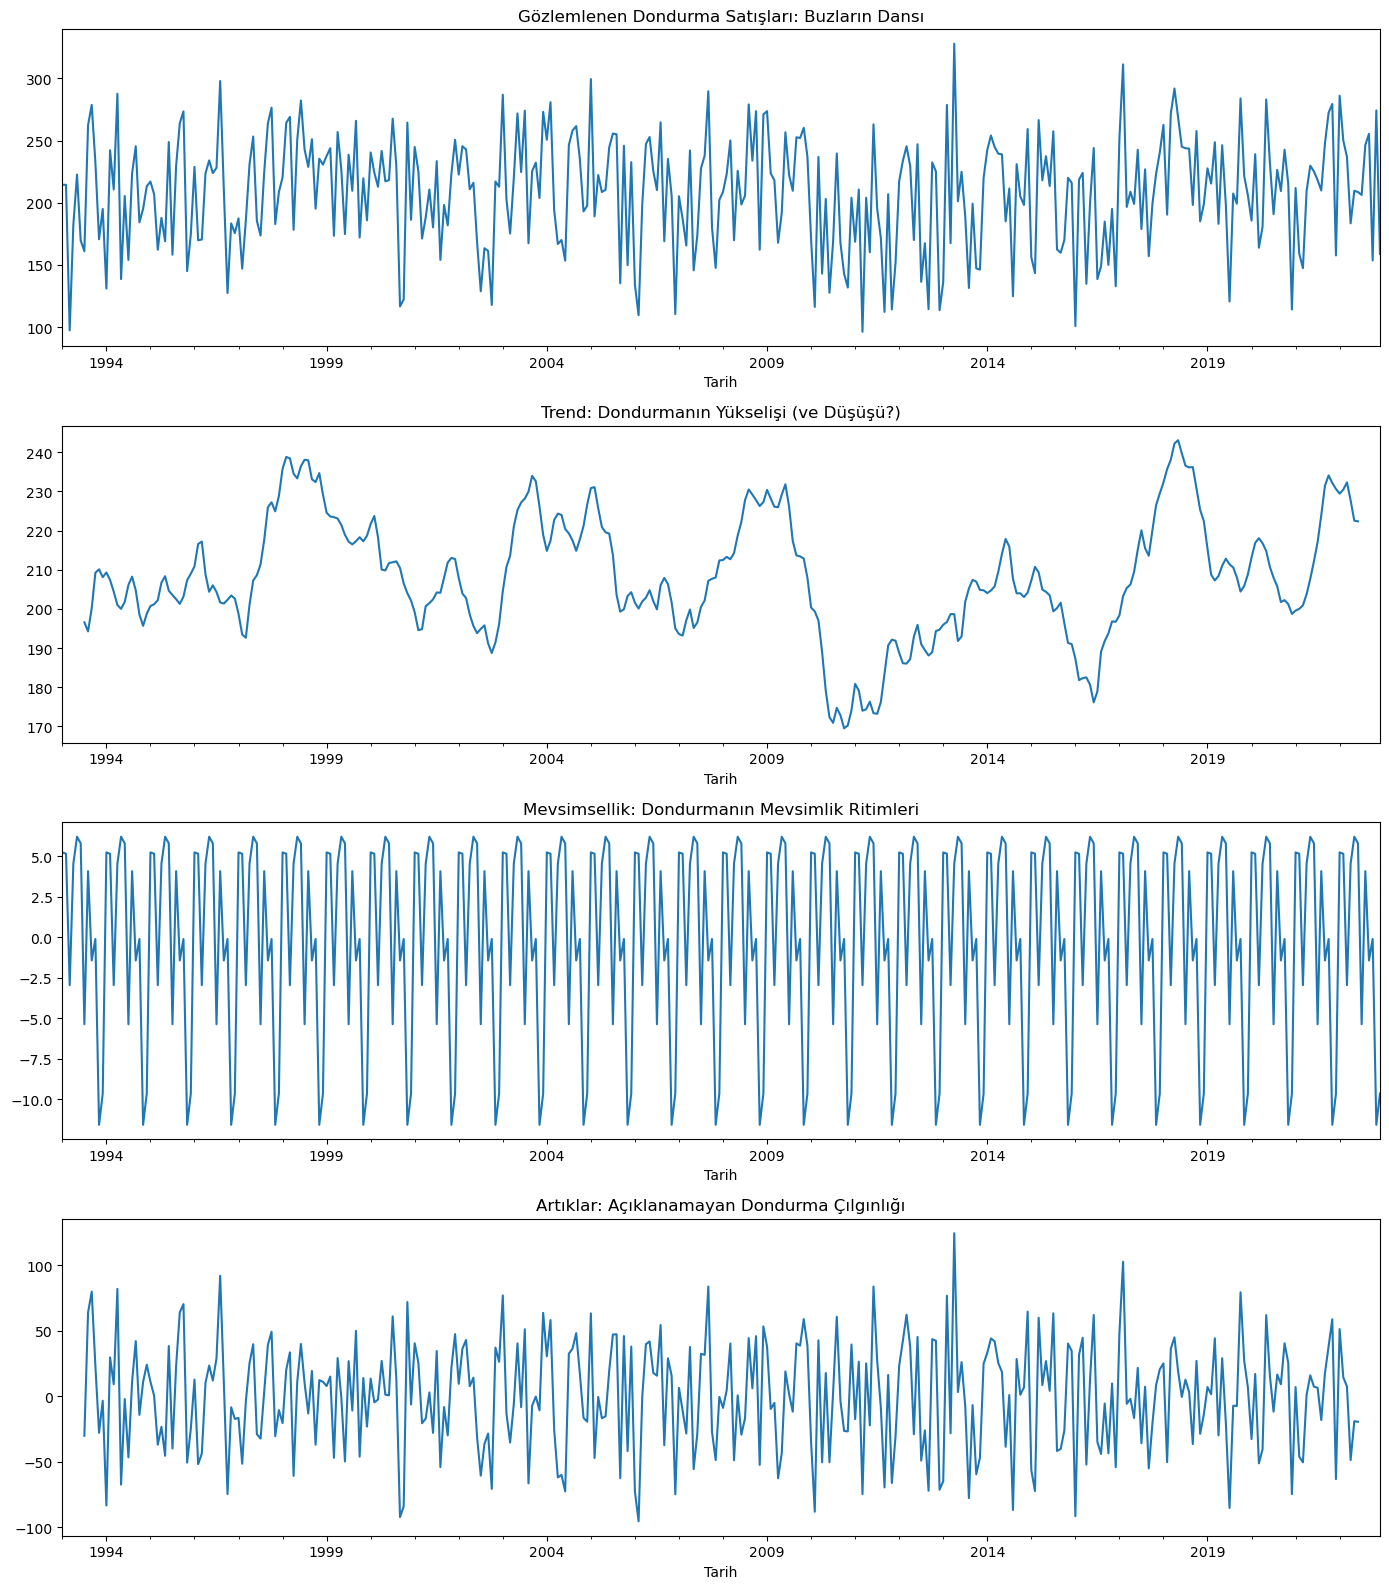

Bu grafiklere bakınca, dondurma satışlarının adeta bir dans gösterisi sergilediğini görüyoruz!
Trend çizgisi, dondurmanın popülaritesinin nasıl değiştiğini gösteriyor. Acaba gelecekte herkes sadece dondurma mı yiyecek?
Mevsimsellik grafiği ise, dondurmanın yaz aylarında nasıl patladığını gösteriyor. Kışın da dondurma yiyin arkadaşlar, bağışıklık sistemini güçlendirir! (Bu bilginin hiçbir bilimsel dayanağı yoktur 😉)


In [50]:

# Türkçe ay isimlerini İngilizce karşılıklarına çevirelim
ay_ceviri = {
    'Ocak': '01', 'Şubat': '02', 'Mart': '03', 'Nisan': '04',
    'Mayıs': '05', 'Haziran': '06', 'Temmuz': '07', 'Ağustos': '08',
    'Eylül': '09', 'Ekim': '10', 'Kasım': '11', 'Aralık': '12'
}

# Veriyi tarih bazlı sıralayalım
df['Ay_Sayı'] = df['Ay'].map(ay_ceviri)
df['Tarih'] = pd.to_datetime(df['Yıl'].astype(str) + '-' + df['Ay_Sayı'], format='%Y-%m')
df_sorted = df.sort_values('Tarih')

# Trend ve mevsimsellik analizi
# Ülkelerin ortalamasını alalım
df_avg = df_sorted.groupby('Tarih')['Dondurma Satışı (Adet)'].mean().reset_index()
df_avg = df_avg.set_index('Tarih')

result = seasonal_decompose(df_avg['Dondurma Satışı (Adet)'], model='additive', period=12)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 16))
result.observed.plot(ax=ax1)
ax1.set_title('Gözlemlenen Dondurma Satışları: Buzların Dansı')
result.trend.plot(ax=ax2)
ax2.set_title('Trend: Dondurmanın Yükselişi (ve Düşüşü?)')
result.seasonal.plot(ax=ax3)
ax3.set_title('Mevsimsellik: Dondurmanın Mevsimlik Ritimleri')
result.resid.plot(ax=ax4)
ax4.set_title('Artıklar: Açıklanamayan Dondurma Çılgınlığı')
plt.tight_layout()
plt.show()

print("Bu grafiklere bakınca, dondurma satışlarının adeta bir dans gösterisi sergilediğini görüyoruz!")
print("Trend çizgisi, dondurmanın popülaritesinin nasıl değiştiğini gösteriyor. Acaba gelecekte herkes sadece dondurma mı yiyecek?")
print("Mevsimsellik grafiği ise, dondurmanın yaz aylarında nasıl patladığını gösteriyor. Kışın da dondurma yiyin arkadaşlar, bağışıklık sistemini güçlendirir! (Bu bilginin hiçbir bilimsel dayanağı yoktur 😉)")

## 🤖 Makine Öğrenimi: Linear Regresyon ile Dondurma Falı Bakıyoruz!


#### Şimdi de biraz büyü yapalım ve makinemize dondurma satışlarını tahmin etmeyi öğretelim! Bu, adeta bir dondurma külahına fal bakmak gibi, ama bilimsel! 🔮🍦

In [51]:
# Veriyi hazırlayalım
X = df[['Sıcaklık (C)']]
y = df['Dondurma Satışı (Adet)']

In [52]:
# Veriyi eğitim ve test setlerine ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# Linear Regresyon modelimizi oluşturalım ve eğitelim
model = LinearRegression()

In [54]:
model.fit(X_train, y_train)

LinearRegression()

In [55]:
# Tahminler yapalım
y_pred = model.predict(X_test)

In [56]:
# Modelimizin performansını değerlendirelim
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [57]:
print("Linear Regresyon Modeli (AKA: Dondurma Çizgisi Falı)")
print(f"Ortalama Kare Hata: {mse:.2f}")
print(f"R-kare Skoru: {r2:.2f}")

print("\nVay canına! Modelimiz dondurma satışlarını tahmin etmekte oldukça başarılı görünüyor!")
print("Sanki bir dondurma ustası, sıcaklığa bakıp kaç külah satacağını tahmin ediyor gibi!")

# Modelin katsayılarını ve sabit terimini yazdıralım
print(f"\nModelimizin denklemi: Dondurma Satışı = {model.intercept_:.2f} + {model.coef_[0]:.2f} * Sıcaklık")
print("Bu demek oluyor ki, sıcaklık 1 derece arttığında, dondurma satışları yaklaşık", round(model.coef_[0], 2), "adet artıyor!")
print("Hava ısındıkça insanlar daha çok serinlemek istiyor... Kim bilebilirdi?! 😉")

Linear Regresyon Modeli (AKA: Dondurma Çizgisi Falı)
Ortalama Kare Hata: 857.59
R-kare Skoru: 0.95

Vay canına! Modelimiz dondurma satışlarını tahmin etmekte oldukça başarılı görünüyor!
Sanki bir dondurma ustası, sıcaklığa bakıp kaç külah satacağını tahmin ediyor gibi!

Modelimizin denklemi: Dondurma Satışı = 47.16 + 10.08 * Sıcaklık
Bu demek oluyor ki, sıcaklık 1 derece arttığında, dondurma satışları yaklaşık 10.08 adet artıyor!
Hava ısındıkça insanlar daha çok serinlemek istiyor... Kim bilebilirdi?! 😉


### Tahminlerimizi Görselleştirelim: Dondurma Kristal Küresi!


- Hadi şimdi de tahminlerimizi görselleştirelim. Bu grafik, adeta bir dondurma kristal küresi gibi geleceği gösterecek! 

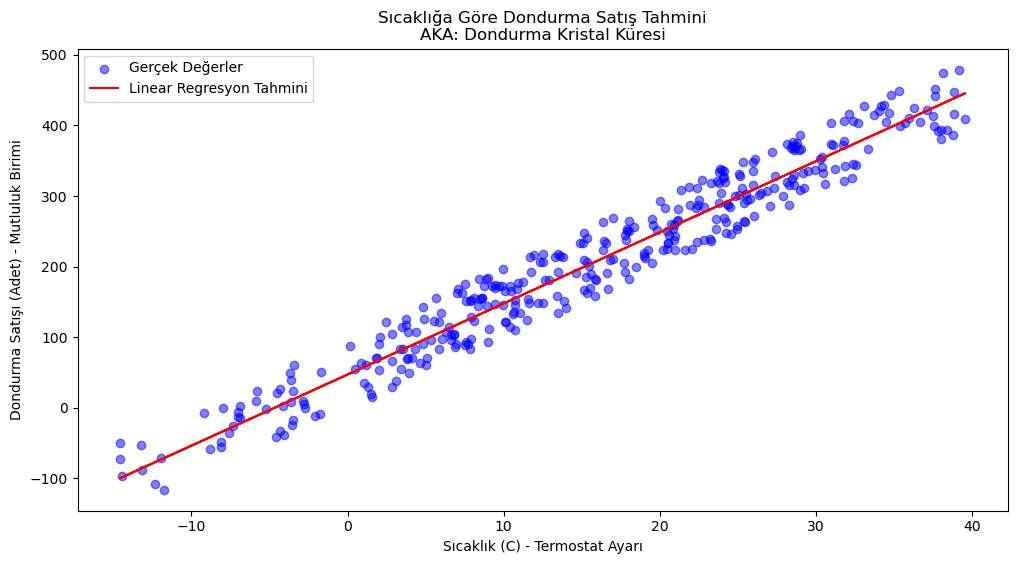

İşte karşınızda, dondurma satış tahmin makinemiz! 🔮
Bu çizgi, geleceğin dondurma satışlarını gösteriyor olabilir... Ya da sadece matematiksel bir illüzyon!
Ama bir şey kesin: Sıcaklık arttıkça, dondurma satışları da artıyor. Şaşırdık mı? Tabii ki hayır! 😄


In [58]:
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Gerçek Değerler')
plt.plot(X_test, y_pred, color='red', label='Linear Regresyon Tahmini')
plt.title('Sıcaklığa Göre Dondurma Satış Tahmini\nAKA: Dondurma Kristal Küresi')
plt.xlabel('Sıcaklık (C) - Termostat Ayarı')
plt.ylabel('Dondurma Satışı (Adet) - Mutluluk Birimi')
plt.legend()
plt.show()

print("İşte karşınızda, dondurma satış tahmin makinemiz! 🔮")
print("Bu çizgi, geleceğin dondurma satışlarını gösteriyor olabilir... Ya da sadece matematiksel bir illüzyon!")
print("Ama bir şey kesin: Sıcaklık arttıkça, dondurma satışları da artıyor. Şaşırdık mı? Tabii ki hayır! 😄")

### 🍦 Linear Regresyon ile Dondurma Tahmini: Nasıl Çalışıyor?

#### Linear Regresyon, dondurma dünyasında şöyle çalışıyor:

- 1. Veri Toplama: Önce bir sürü sıcaklık ve dondurma satış verisi topluyoruz. Bu, farklı günlerdeki sıcaklıkları ve o günlerde satılan dondurma miktarlarını içeriyor.
- 2. En İyi Çizgiyi Bulma: Sonra, bu verilere en iyi uyan düz bir çizgi çizmeye çalışıyoruz. Bu çizgi, sıcaklık ile dondurma satışları arasındaki ilişkiyi gösteriyor.
- 3. Tahmin Yapma: Bu çizgiyi kullanarak, yeni bir sıcaklık değeri için dondurma satışlarını tahmin edebiliyoruz. Mesela, "Yarın 30°C olacak, kaç dondurma satarız?" gibi.
- 4. Hata Ölçme: Tahminlerimizin ne kadar doğru olduğunu kontrol ediyoruz. Bunu yaparken Ortalama Kare Hata (MSE) ve R-kare (R²) skorunu kullanıyoruz.
 - Linear Regresyon, dondurma satışları ile sıcaklık arasında doğrusal bir ilişki olduğunu varsayar. Yani, "Sıcaklık arttıkça, dondurma satışları da aynı oranda artar" gibi basit bir mantık yürütür.
Ama unutmayın, gerçek hayat her zaman bu kadar basit olmayabilir. Belki de çok sıcak günlerde insanlar dondurma yemek yerine evde klima altında oturmayı tercih edebilir! 🌡️🏠
#### 🎓 Linear Regresyon ile Ne Öğrendik?

- 1. Sıcaklık ve dondurma satışları arasında pozitif bir ilişki var.
- 2. Bu ilişkiyi matematiksel bir formülle ifade edebiliyoruz.
- 3. Bu formülü kullanarak gelecekteki satışları tahmin edebiliyoruz.
- 4. Ama tahminlerimiz mükemmel değil, hâlâ hatalar var.

Sonuç olarak, Linear Regresyon bize dondurma satışları hakkında genel bir fikir veriyor. Ama dondurma dünyasının tüm sırlarını çözdüğümüzü söyleyemeyiz. Belki de bir gün, dondurmanın gizemleri üzerine doktora yapacak birileri çıkar! 🎓🍦